**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# write your code here
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

Verify that $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$ with symbol Python

In [2]:
# write your code here
#Define the symbols
C = sm.symbols('C')
G = sm.symbols('G')
L = sm.symbols('L')
w = sm.symbols('w')
w_tilde = sm.symbols('wtilde')
alpha = sm.symbols('alpha')
kappa = sm.symbols('kappa')
nu = sm.symbols('nu')
omega = sm.symbols('omega')
tau = sm.symbols('tau')

In [3]:
#Define the utility function
objective = sm.ln(C**alpha*G**(1-alpha))-nu*L**2/2
objective

-L**2*nu/2 + log(C**alpha*G**(1 - alpha))

In [4]:
budget_constraint = kappa+(1-tau)*w*L
budget_constraint

L*w*(1 - tau) + kappa

In [5]:
objective_subs = objective.subs(C,budget_constraint)
objective_subs

-L**2*nu/2 + log(G**(1 - alpha)*(L*w*(1 - tau) + kappa)**alpha)

In [6]:
objective_subs_2 = objective_subs.subs(w*(1-tau),w_tilde)
objective_subs_2

-L**2*nu/2 + log(G**(1 - alpha)*(L*wtilde + kappa)**alpha)

In [7]:
foc = sm.diff(objective_subs_2, L)
foc

G**(1 - alpha)*G**(alpha - 1)*alpha*wtilde/(L*wtilde + kappa) - L*nu

In [8]:
sol = sm.solve(sm.Eq(foc,0), L)
sol[0]

(-kappa*nu - sqrt(nu*(4*alpha*wtilde**2 + kappa**2*nu)))/(2*nu*wtilde)

In [9]:
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
tau = 0.30
w = 1
G = 1.5
w_tilde = w*(1-tau)
w=1

Define the function numerically

In [10]:
def objective_function(L):
   C = kappa + (1 - tau) * w * L
   utility = np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2
   return -utility  # Negative sign for maximization




# Define the bounds for the variable L
bounds = [(0, 24)]

optimal_L = minimize(objective_function, x0=12, bounds=bounds).x[0]
print("Optimal hours of labor:", optimal_L)

Optimal hours of labor: 15.301203832018528


Find the optimal amount of labor in the Sympy model

In [11]:
# Define the function L_star
def L_star(w_tilde):
    return (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * w_tilde**2)) / (2 * w_tilde)
# w=1 =>w_tilde=0.7
L_star(0.7)

15.30165022719559

We find that the optimal hours of labor is 15.3 in the numerical and Sympy models

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

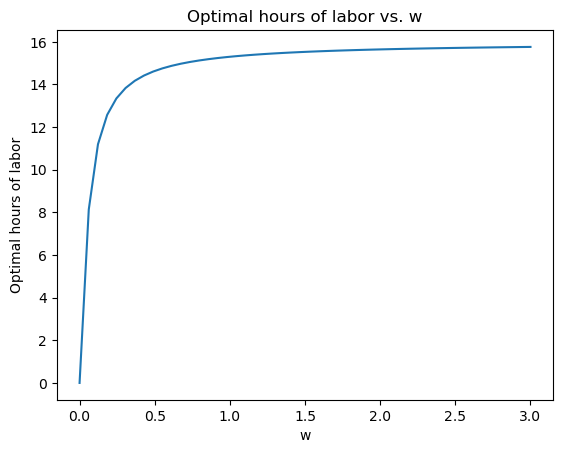

In [12]:

# Define the objective function with the budget constraint substituted in
def objective_function(L,w):
    C = kappa + (1 - tau) * w * L
    utility = np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2
    return -utility  # Negative sign for maximization


# Define the bounds for the variable L
bounds = [(0, 24)]
w_values = np.linspace(0, 3, 50)  # Generate 50 values of w from 1 to 5
optimal_L_values = []

# Loop over different values of w
for w in w_values:
    optimal_L = minimize(objective_function, x0=12, args=(w,), bounds=bounds).x[0]
    optimal_L_values.append(optimal_L)
# Plot the results
plt.plot(w_values, optimal_L_values)
plt.xlabel('w')
plt.ylabel('Optimal hours of labor')
plt.title('Optimal hours of labor vs. w')
plt.show()




We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


People consider government spending when working
As the agents gain from public consumption the amount of hours worked increase
$\alpha=0.5$ so agents doesn't prefer the consumption is from themselves or the government

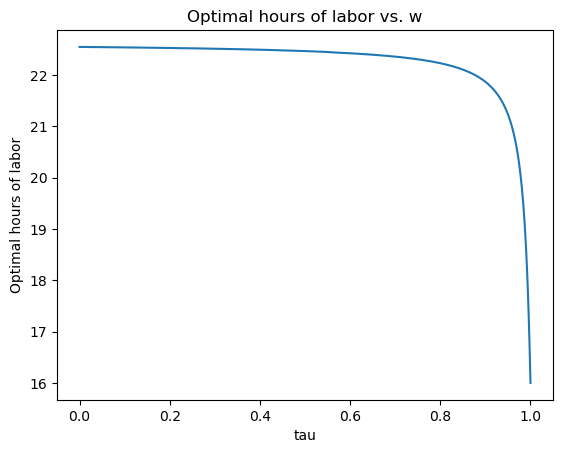

In [13]:
# Define the objective function with the budget constraint substituted in
def objective_function(L,tau):
    G = tau*w*L
    C = kappa + (1 - tau) * w * L
    utility = np.log(C**alpha * G**(1 - alpha)) - nu * (L**2) / 2
    return -utility  # Negative sign for maximization


# Define the bounds for the variable L
bounds = [(1e-12, 24)]
tau_values = np.linspace(1e-12, 1-1e-12, 1000)  # Generate 50 values of w from 1 to 5
optimal_L_values = []
optimal_G_values = []
optimal_utility_values = []
# Loop over different values of w
for tau in tau_values:
    solution = minimize(objective_function, x0=12, args=(tau,), bounds=bounds)
    optimal_L = solution.x[0]
    optimal_L_values.append(optimal_L)
    optimal_G = tau*w*optimal_L*((1-tau)*w)
    optimal_G_values.append(optimal_G)
    optimal_utility = -solution.fun
    optimal_utility_values.append(optimal_utility)
    
# Plot the results
plt.plot(tau_values, optimal_L_values)
plt.xlabel('tau')
plt.ylabel('Optimal hours of labor')
plt.title('Optimal hours of labor vs. w')
plt.show()

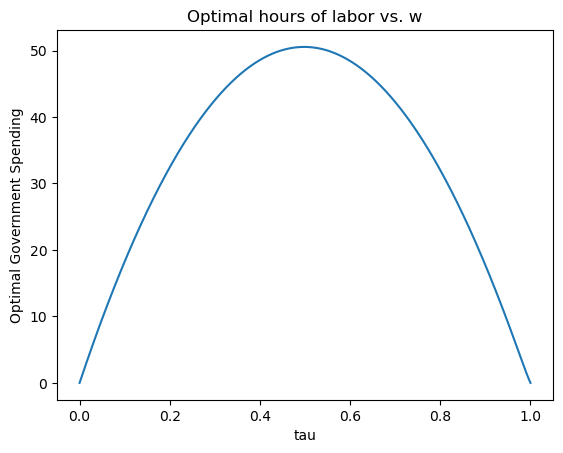

In [14]:
plt.plot(tau_values, optimal_G_values)
plt.xlabel('tau')
plt.ylabel('Optimal Government Spending')
plt.title('Optimal hours of labor vs. w')
plt.show()

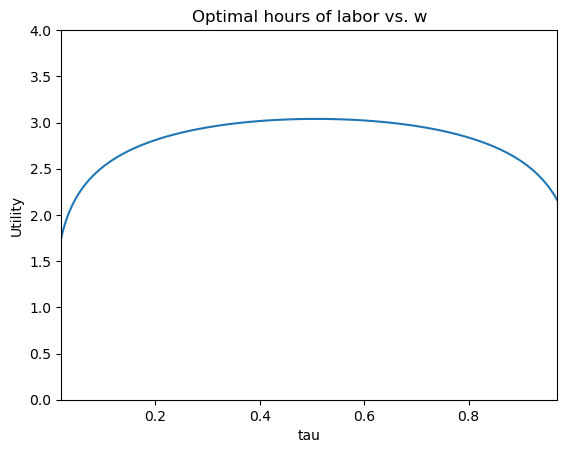

In [15]:
plt.plot(tau_values, optimal_utility_values)
plt.xlabel('tau')
plt.ylabel('Utility')
plt.title('Optimal hours of labor vs. w')
plt.xlim(0.02,0.97)
plt.ylim(0,4)
plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [16]:
optimumvalues= max( (v, i) for i, v in enumerate(optimal_utility_values) )
optimumvalues[1]


507

In [17]:
optimumvalues[0]

3.0393046768154868

In [18]:
tau_values[optimumvalues[1]]


0.5075075075074925

When the tax is equal to 50.8% the utility is maximized

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

When sigma=rho=1 the CES function converges to Coop-Douglas. So labor supply does not depend on G. 

In [19]:
# Define the objective function with the budget constraint substituted in
def objective_function_CES(L,tau,sigma,rho,epsilon):
    C = kappa + (1 - tau) * w * L
    G = tau*w*L
    utility = (((alpha*C**((sigma-1)/sigma) + (1-alpha)*G**((sigma-1)/sigma))**(sigma/(sigma-1)))**(1-rho)-1)/(1-rho)-nu*L**(1+epsilon)/(1+epsilon)
    return -utility  # Negative sign for maximization

In [20]:
w=1
tau = 0.5075
sigma=1.001
rho=1.001
epsilon=1
optimal_L_1 = minimize(objective_function_CES, x0=12,args=(tau,sigma,rho,epsilon,), bounds=bounds).x[0]
sigma=1.5
rho=1.5
epsilon=1
optimal_L_2 = minimize(objective_function_CES, x0=12,args=(tau,sigma,rho,epsilon,), bounds=bounds).x[0]
print("Optimal hours of labor set 1:", optimal_L_1)
print("Optimal hours of labor set 2:", optimal_L_2)

Optimal hours of labor set 1: 22.118456068587847
Optimal hours of labor set 2: 13.355002419916632


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

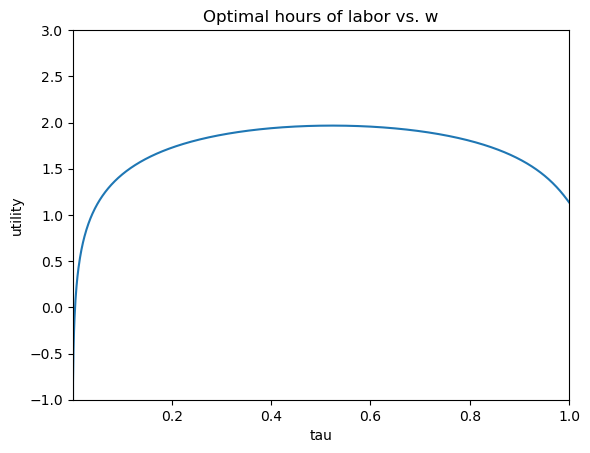

In [21]:
# write your code here  
# Define the bounds for the variable L
bounds = [(1e-12, 24)]
tau_values = np.linspace(1e-12, 1-1e-12, 1000)  # Generate 50 values of w from 1 to 5
optimal_utility_values_1 = []

sigma=1.001
rho=1.001
epsilon=1
# Loop over different values of w
for tau in tau_values:
    solution = minimize(objective_function_CES, x0=12, args=(tau,sigma,rho,epsilon,), bounds=bounds)
    optimal_utility_1 = -solution.fun
    optimal_utility_values_1.append(optimal_utility_1)
    
# Plot the results
plt.plot(tau_values, optimal_utility_values_1)
plt.xlabel('tau')
plt.ylabel('utility')
plt.xlim(0.001,1)
plt.ylim(-1,3)
plt.title('Optimal hours of labor vs. w')
plt.show()

In [22]:
optimumvalues_1= max( (v, i) for i, v in enumerate(optimal_utility_values_1) )
print(optimumvalues_1[1])
print(optimumvalues_1[0])
print(tau_values[optimumvalues_1[1]])

522
1.9667318772294045
0.5225225225224776


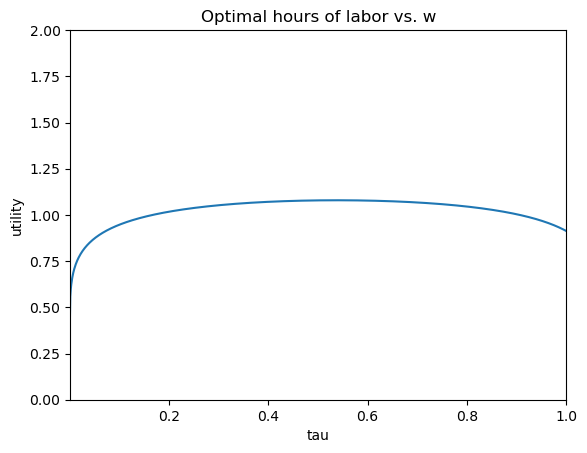

In [23]:
sigma=1.5
rho=1.5
epsilon=1
optimal_utility_values_2 = []
# Loop over different values of w
for tau in tau_values:
    solution = minimize(objective_function_CES, x0=12, args=(tau,sigma,rho,epsilon,), bounds=bounds)
    optimal_utility_2 = -solution.fun
    optimal_utility_values_2.append(optimal_utility_2)
    
# Plot the results
plt.plot(tau_values, optimal_utility_values_2)
plt.xlabel('tau')
plt.ylabel('utility')
plt.xlim(0.001,1)
plt.ylim(0,2)
plt.title('Optimal hours of labor vs. w')
plt.show()

In [24]:
optimumvalues_2= max( (v, i) for i, v in enumerate(optimal_utility_values_2) )
print(optimumvalues_2[1])
print(optimumvalues_2[0])
print(tau_values[optimumvalues_2[1]])

537
1.079301560916691
0.5375375375374625


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [25]:
# import

#define profit function
def profit(l, kappa):
    profit = kappa * l**(1 - eta) - w * l
    return -profit
# define parameters
eta = 0.5
w = 1


kappa_values = [1, 2]


for kappa in kappa_values:
    result = minimize(profit, x0=0, args=(kappa,))
    optimum_l = result.x[0]
    optimum_profit = -result.fun


    print("Kappa=", kappa,":", "Optimum l=", optimum_l, "Optimum profit=", optimum_profit)



Kappa= 1 : Optimum l= 0.2499964502963941 Optimum profit= 0.24999999998739952
Kappa= 2 : Optimum l= 0.9999975155570141 Optimum profit= 0.9999999999984569


In [26]:

def sol_l(eta,w,kappa):
    return((1-eta)*kappa/w)**(1/eta)
for kappa in kappa_values:
    optimum_l = sol_l(eta, w, kappa)
    print("Kappa=", kappa,":", "Optimum l=", optimum_l)

Kappa= 1 : Optimum l= 0.25
Kappa= 2 : Optimum l= 1.0


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [27]:
# write your code here 
# Parameters
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
eta = 0.5
w = 1


def demand_shocks(kappa_0, rho, sigma_epsilon, num_periods, seed):
    np.random.seed(seed)  # Set the random seed
    kappa_values = [kappa_0]


    for t in range(1, num_periods):
        epsilon = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon)
        log_kappa = rho * np.log(kappa_values[t-1]) + epsilon
        kappa_t = np.exp(log_kappa)
        kappa_values.append(kappa_t)


    return kappa_values


kappa_0 = 1
num_periods = 120
seed = 123  # Set the desired random seed


demand_shock_values = demand_shocks(kappa_0, rho, sigma_epsilon, num_periods, seed) # list of demand shocks
optimal_l_list = [sol_l(eta,w,kappa) for kappa in demand_shock_values] # list of labor supply given demand shocks


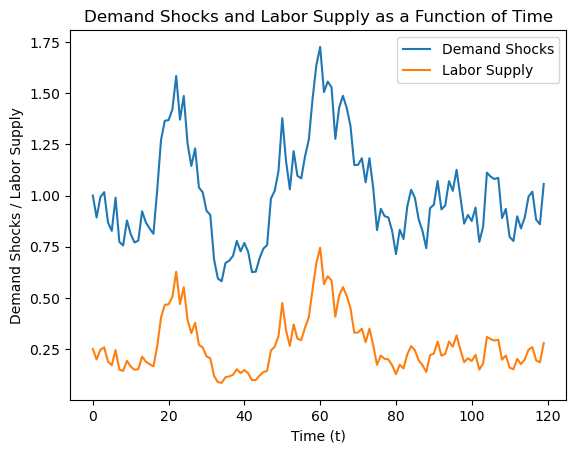

In [28]:
#make plot of demand shocks and labor supply .
plt.plot(range(num_periods), demand_shock_values, label='Demand Shocks')
plt.plot(range(num_periods), optimal_l_list, label='Labor Supply')
plt.xlabel('Time (t)')
plt.ylabel('Demand Shocks / Labor Supply')
plt.title('Demand Shocks and Labor Supply as a Function of Time')
plt.legend()
plt.show()


In [29]:
# Function to calculate the ex-post value of the salon
def ex_post_value(demand_shocks, labor_supply):
    value = 0
    for t in range(len(demand_shocks)):
        profit = demand_shocks[t] * labor_supply[t] ** (1 - eta) - w * labor_supply[t]
        adjustment_cost = iota if t > 0 and labor_supply[t] != labor_supply[t-1] else 0
        value += R ** (-t) * (profit - adjustment_cost)
    return value


# Perform sensitivity analysis
K_values = [100, 1000, 5000, 10000]  # Different values of K to test


results = []
for K in K_values:
    ex_post_values = []
    for k in range(K):
        ex_post_value_k = ex_post_value(demand_shock_values, optimal_l_list)
        ex_post_values.append(ex_post_value_k)


    H = np.mean(ex_post_values)
    results.append((K, H))


# Print the results
for K, H in results:
    print(f"K: {K}, Ex-ante expected value of the salon (H): {H}")

K: 100, Ex-ante expected value of the salon (H): 29.63723551831501
K: 1000, Ex-ante expected value of the salon (H): 29.63723551831502
K: 5000, Ex-ante expected value of the salon (H): 29.637235518315016
K: 10000, Ex-ante expected value of the salon (H): 29.63723551831502


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [30]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [31]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [32]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [33]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [34]:
np.random.seed(3)
K_warmup = 10
def GlobalOpt(K_warmup):
    #Setting
    #1
    tol=1e-8

    #2
    # Set the settings
    
    K_max = 1000
    xs = np.empty((5000,2))
    xopt = np.nan
    fopt=np.inf
    x_k0_values = []

    for k in range(K_max):


        # A + 1
        x_k = -600 + 1200*np.random.uniform(size=(2,)) #bounds


        # B
        if k < K_warmup:
            x_k0 = x_k     
            

        else:
            # C
            chi_k = 0.50 * 2 / (1 + np.exp((k - K_warmup) / 100))
            # D
            x_k0 = chi_k * x_k + (1 - chi_k) * xopt
        # 1. E.
        result = minimize(griewank, x_k0, method='BFGS', tol=tol)
        xs[k,:] = result.x
        # F
        if k == 0 or result.fun < fopt:
            xopt = xs[k,:]
            fopt = result.fun

        x_k0_values.append(x_k0)

        if fopt < tol:
            break


    print(f"Iteration {k}: x_opt = {xopt[0],xopt[1]}, f(x_k0) = {fopt}")


GlobalOpt(K_warmup)


Iteration 139: x_opt = (-8.993968409116461e-09, 3.5676375227375716e-09), f(x_k0) = 0.0


In [35]:
N = np.arange(len(x_k0_values))
x_k0_values = np.array(x_k0_values)
# write your code here
# a. main
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.scatter(x_k0_values[:,0],x_k0_values[:,1],N,c=N);        

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Iteration$')

# c. invert xaxis
ax.invert_xaxis()

# d. colorbar
fig.colorbar(cs);

NameError: name 'x_k0_values' is not defined

In [ ]:
GOFigure(N,x_k0_values)

NameError: name 'N' is not defined

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
np.random.seed(3)
K_warmup=100
GlobalOpt(K_warmup)

Iteration 470: x_opt = (-3.7669608854800825e-09, -1.4137576514706536e-08), f(x_k0) = 0.0


In [ ]:
N = np.arange(len(x_k0_values))
x_k0_values = np.array(x_k0_values)
# write your code here
# a. main
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.scatter(x_k0_values[:,0],x_k0_values[:,1],N,c=N);        

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$Iteration$')

# c. invert xaxis
ax.invert_xaxis()

# d. colorbar
fig.colorbar(cs);